# Influence of Network Structures on Open Source Projects: <br> A Systematic Literature Review

### Appendix A: Calculate Centrality Metrics for Figure 2

In [1]:
#Import dependencies
import networkx as nx
import pandas as pd

In [2]:
# Create graph of Figure 2
B = nx.Graph()
developers_array = ["d1", "d2", "d3", "d4", "d5", "d6", "d7"]
projects_array = ["p1", "p2", "p3", "p4", "p5", "p6", "p7", "p8"]

B.add_nodes_from(developers_array, bipartite=0) #developers
B.add_nodes_from(projects_array, bipartite=1) #projects

# add connections between nodes of different sets
B.add_edges_from([("d1", "p1"), ("d1", "p2"),
                 ("d2", "p2"), ("d2", "p3"),
                 ("d3", "p1"), ("d3", "p3"), ("d3", "p4"),
                 ("d4", "p4"), ("d4", "p5"),
                 ("d5", "p5"), ("d5", "p6"), ("d5", "p8"),
                 ("d6", "p6"), ("d6", "p7"),
                 ("d7", "p7"), ("d7", "p8")])

In [3]:
# Alternatively: Create the same graph like in Grewal et al., 2006, p. 1055

#B = nx.Graph()
#developers_array = ["Adam", "Bob", "Chris", "Jean", "Joan", "David"]
#projects_array = ["Deskpro", "Screenpro", "Keypro"]

#B.add_nodes_from(developers_array, bipartite=0) #developers
#B.add_nodes_from(projects_array, bipartite=1) #projects


#B.add_edges_from([("Adam", "Deskpro"), ("Chris", "Deskpro"), ("Jean", "Deskpro"),
#                 ("Adam", "Screenpro"), ("Bob", "Screenpro"),
#                 ("Joan", "Keypro"), ("David", "Keypro")])

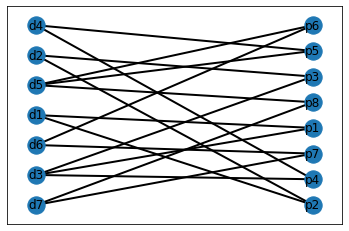

In [4]:
# Draw bipartite graph
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, developers_array), width = 2)

In [5]:
# Show adjacency matrix
a = nx.algorithms.bipartite.matrix.biadjacency_matrix(B, row_order=developers_array, column_order=projects_array)
for i in a:
    print(list(i.A[0]))

[1, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 0, 1]
[0, 0, 0, 0, 0, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 1]


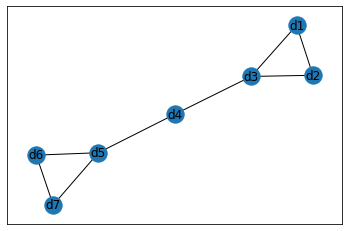

In [6]:
# Draw projection graph at developer level (transfer two-mode into one-mode network)
projectG_developer = nx.algorithms.bipartite.projection.projected_graph(B, nodes=developers_array)
nx.draw_networkx(projectG_developer)

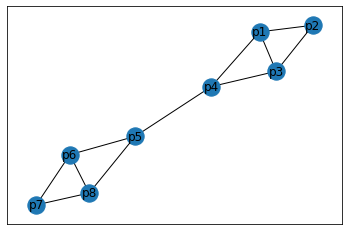

In [7]:
# Draw projection graph at project level (transfer two-mode into one-mode network)
projectG_projects = nx.algorithms.bipartite.projection.projected_graph(B, nodes=projects_array)
nx.draw_networkx(projectG_projects)

In [8]:
# Calucate metrics
degree_cen = nx.algorithms.bipartite.centrality.degree_centrality(B, nodes=developers_array)
betweenness_cen = nx.algorithms.bipartite.centrality.betweenness_centrality(B, nodes=developers_array)
closeness_cen = nx.algorithms.bipartite.centrality.closeness_centrality(B, nodes=developers_array)
# Grewal et al. (2006) use this eigenvector centrality metric (p. 1055).
eigenvector_cen = nx.eigenvector_centrality(B, max_iter=1000) 

In [9]:
def displayResults(centrality, description):
    df = pd.DataFrame(centrality.items(),  columns=["Node", description])
    df = df.round(decimals=4) # 4 decimal places are enough
    df.sort_values(["Node"], inplace=True)
    df_dev = df[df["Node"].isin(developers_array)]
    df_pro = df[df["Node"].isin(projects_array)]

    display(df_dev)
    print("Developer Level")
    
    display(df_pro)
    print("Project Level")

### Degree Centrality

In [10]:
displayResults(degree_cen, "Degree Centrality")

,Node,Degree Centrality
3,d1,0.250
5,d2,0.250
1,d3,0.375
6,d4,0.250
4,d5,0.375
2,d6,0.250
0,d7,0.250


Developer Level


,Node,Degree Centrality
10,p1,0.2857
7,p2,0.2857
12,p3,0.2857
8,p4,0.2857
13,p5,0.2857
14,p6,0.2857
9,p7,0.2857
11,p8,0.2857


Project Level


### Betweenness  Centrality

In [11]:
displayResults(betweenness_cen, "Betweenness Centrality")

,Node,Betweenness Centrality
0,d1,0.0765
1,d2,0.0765
2,d3,0.5529
3,d4,0.5765
4,d5,0.5529
5,d6,0.0765
6,d7,0.0765


Developer Level


,Node,Betweenness Centrality
7,p1,0.1845
8,p2,0.0238
9,p3,0.1845
10,p4,0.5714
11,p5,0.5714
12,p6,0.1845
13,p7,0.0238
14,p8,0.1845


Project Level


### Closeness Centrality

In [12]:
displayResults(closeness_cen, "Closeness Centrality")

,Node,Closeness Centrality
3,d1,0.3030
5,d2,0.3030
1,d3,0.4167
6,d4,0.4545
4,d5,0.4167
2,d6,0.3030
0,d7,0.3030


Developer Level


,Node,Closeness Centrality
10,p1,0.3684
7,p2,0.2800
12,p3,0.3684
8,p4,0.4667
13,p5,0.4667
14,p6,0.3684
9,p7,0.2800
11,p8,0.3684


Project Level


### Eigenvector Centrality

In [13]:
displayResults(eigenvector_cen, "Eigenvector Centrality")

,Node,Eigenvector Centrality
0,d1,0.2021
1,d2,0.2021
2,d3,0.3665
3,d4,0.2605
4,d5,0.3665
5,d6,0.2021
6,d7,0.2021


Developer Level


,Node,Eigenvector Centrality
7,p1,0.2592
8,p2,0.1842
9,p3,0.2592
10,p4,0.2858
11,p5,0.2858
12,p6,0.2592
13,p7,0.1842
14,p8,0.2592


Project Level


### References 

Grewal, R., Lilien, G. L., & Mallapragada, G. (2006). Location, Location, Location: How Network Embeddedness Affects Project Success in Open Source Systems. *Management Science*, 52(7), 1043–1056. https://doi.org/10.1287/mnsc.1060.0550

Mallapragada, G., Grewal, R., & Lilien, G. L. (2012). User-Generated Open Source Products: Founder's Social Capital and Time to Product Release. *Marketing Science*, 31(3), 474–492. https://doi.org/10.1287/mksc.1110.0690